In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Text(0.5, 0, 'CRIM')

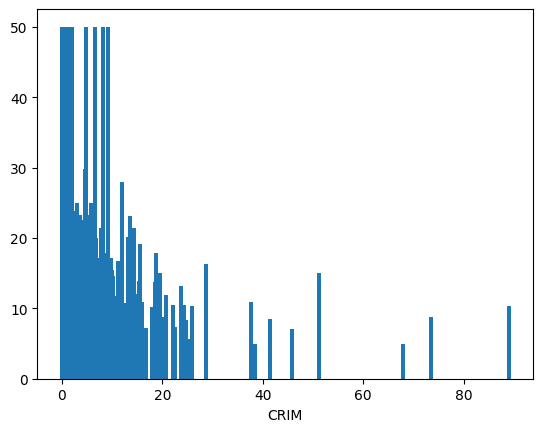

In [ ]:
plt.bar(df.CRIM,df.MEDV)
plt.xlabel('CRIM') 

In [ ]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].mean(),inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(),inplace=True)


df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.shape

(506, 14)

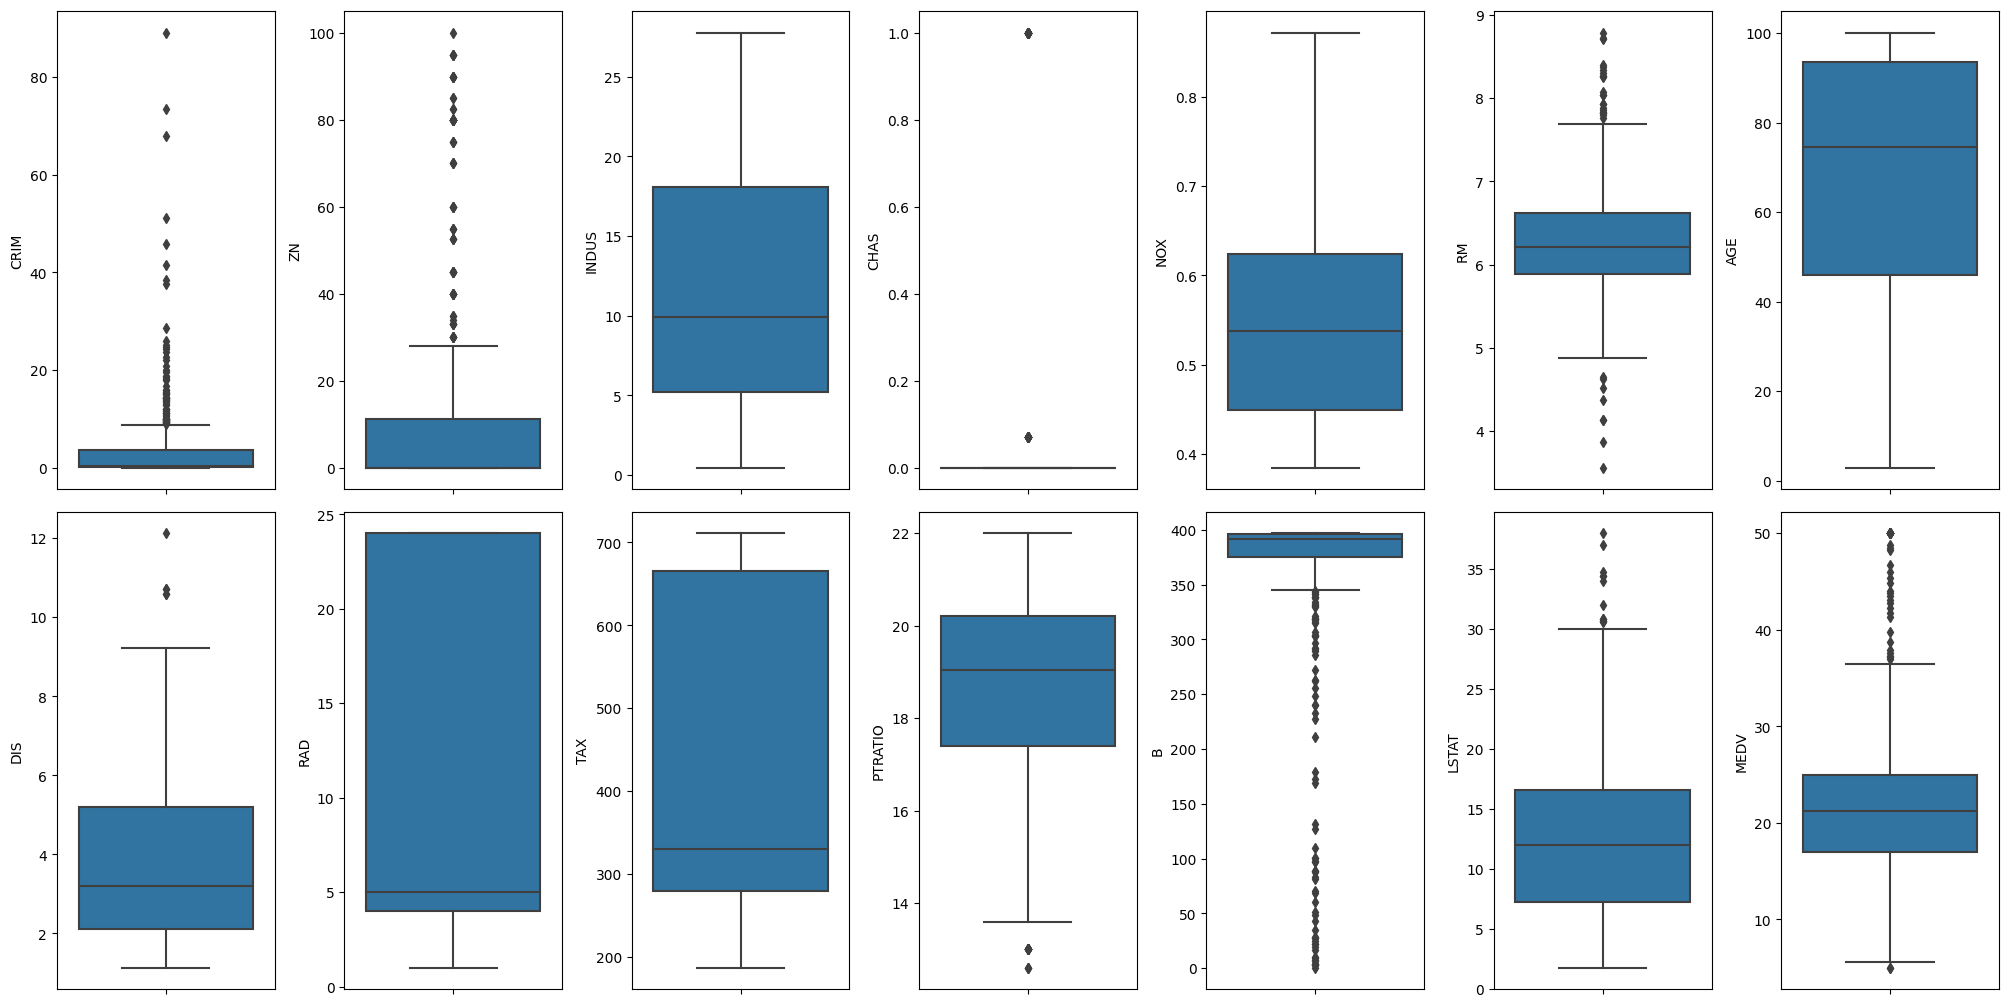

In [ ]:
fig,axs = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
axs = axs.flatten()

for col,value in df.items():
  sns.boxplot(y=col,data=df,ax=axs[index])
  index += 1

plt.tight_layout(pad=0.4,w_pad=1, h_pad=1)  
plt.show()

<Axes: >

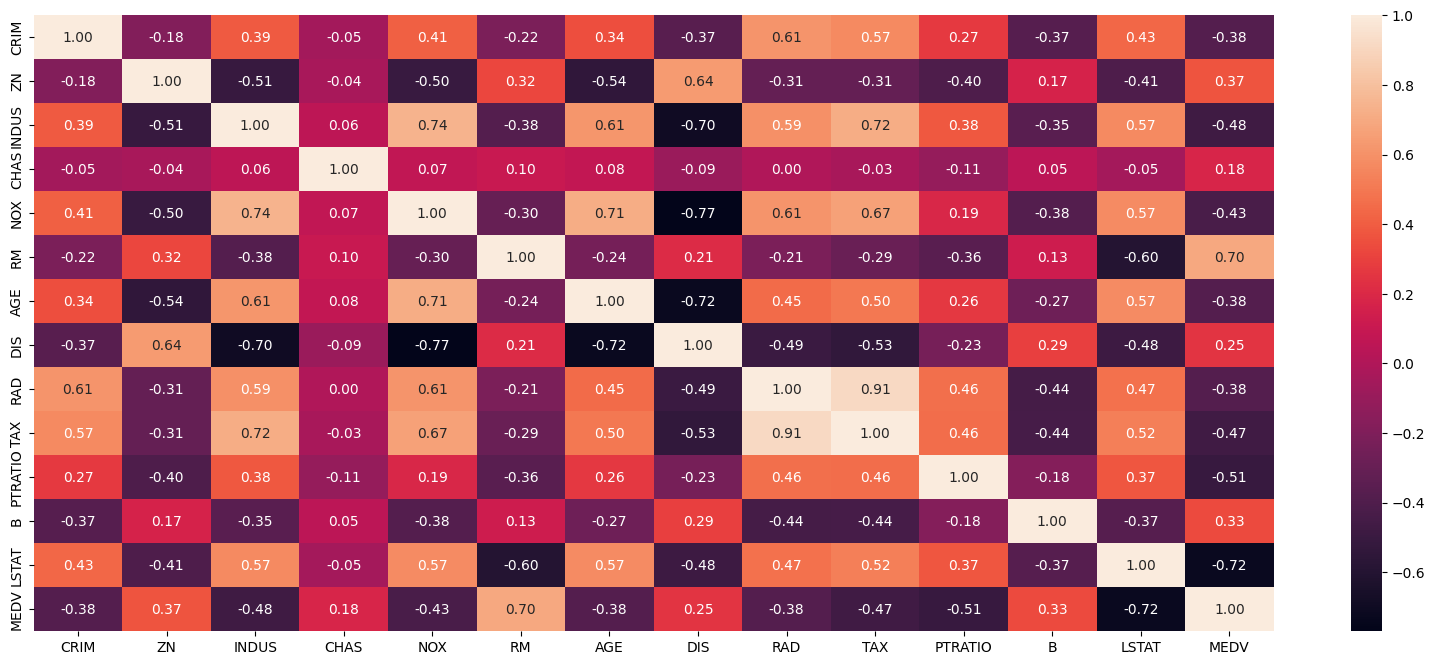

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [ ]:
import numpy as np
X = pd.DataFrame(np.c_[df['LSTAT'],df['RM']],columns=['LSTAT','RM'])
Y = df['MEDV']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_train_predict = lin_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))
r2 = r2_score(Y_train,y_train_predict)
print("For training : ")
print("RMSE : ",rmse)
print("R2 : ",r2)

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

For training : 
RMSE :  5.7420988390505165
R2 :  0.6161694121128031
The model performance for testing set
--------------------------------------
RMSE is 5.134765538745576
R2 score is 0.6632454421501065
